<a href="https://colab.research.google.com/github/rahulyad011/intrusion-detection/blob/main/ARP_MitM_Kitsune_Network_Attack_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC

# MLP requirements 
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

# LSTM requirements 
from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# evaluation metrices
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import det_curve

# representation of model layers
from keras.utils.vis_utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bin_data_total = data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/kitsume_network_attack_dataset/ARP_MitM_dataset_kitsune_binary_data_1M.csv")
bin_data_total.drop(bin_data_total.columns[0],axis=1,inplace=True)
bin_data_total

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
0,350.232184,1346.162089,175204.643884,596.288170,1344.152560,176390.518563,1885.876040,1340.571874,180675.586143,19599.011695,...,0.000000e+00,20834.038285,1340.225752,426.585925,1340.225752,181975.551472,0.000000e+00,0.000000e+00,405598,0.0
1,483.667535,1351.017245,176928.604058,751.927224,1347.076578,180167.492567,2059.863374,1341.664931,182967.131001,19743.118945,...,0.000000e+00,25103.572515,1340.948807,425.394365,1340.948807,180960.366187,0.000000e+00,0.000000e+00,671202,0.0
2,27.468728,60.459899,63.980515,47.049431,60.983788,140.551410,143.154994,61.857620,264.706949,1408.647025,...,-1.504107e-08,5490.475482,60.000000,0.000005,1229.654179,55705.673832,-5.194824e-12,-4.441597e-09,149918,0.0
3,368.255476,1345.441370,169643.854754,625.578287,1338.793580,178768.342198,1937.615595,1334.710133,186236.473252,19602.075820,...,0.000000e+00,27540.438942,1341.861245,424.338178,1341.861245,180062.889686,0.000000e+00,0.000000e+00,1202122,0.0
4,160.445579,1296.716764,142232.637775,280.933089,1300.258342,137789.153434,869.088644,1299.887529,137571.580945,8730.023410,...,0.000000e+00,27694.579703,1335.202333,426.134022,1335.202333,181590.204914,0.000000e+00,0.000000e+00,1209727,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25038,500.763780,1367.161062,156499.812125,767.028059,1357.816530,167075.534413,2075.431991,1344.753421,179986.066880,19362.648892,...,0.000000e+00,27984.157881,1341.264731,425.129209,1341.264731,180734.844531,0.000000e+00,0.000000e+00,1760567,1.0
25039,21.991515,60.792727,412.846060,39.709418,61.839811,925.933226,133.417182,63.251001,1458.248854,1415.342052,...,-2.017417e-08,13958.347633,60.000000,0.000003,1230.064027,55377.386774,-4.492515e-11,-7.077473e-08,1784438,1.0
25040,159.056565,1273.750274,155330.991574,276.015559,1283.112032,149476.401129,861.924634,1293.243697,142560.936433,8709.474892,...,0.000000e+00,28078.725730,1335.258631,426.198370,1335.258631,181645.050190,0.000000e+00,0.000000e+00,1690990,1.0
25041,140.130704,1265.963572,169804.095065,248.857773,1276.265930,159666.631694,822.903199,1288.946201,147881.156661,8692.554937,...,0.000000e+00,28167.882342,1334.628592,427.074737,1334.628592,182392.830646,0.000000e+00,0.000000e+00,2293956,1.0


In [ ]:
# distribution of label class before sampling
data_size = bin_data_total.shape[0]
# data_size
bin_data_total.label.value_counts()/data_size

0.0    0.542667
1.0    0.457333
Name: label, dtype: float64

In [ ]:
model_name_suffix = "_kitsune_arp_mitm"

In [ ]:
# numeric feature normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

numeric_cols = bin_data_total.select_dtypes(['number']).columns
numeric_cols = numeric_cols.drop('label')
flag = 0
scaler = None
if flag:
  # using standard scaler for normalizing
  scaler = StandardScaler()
else:
  # using minmax scaler for normalizing
  # to avoid negative values after scaling
  scaler = MinMaxScaler()

def normalization_train(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.fit_transform(arr.reshape(len(arr),1))
  return df

def normalization_test(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.transform(arr.reshape(len(arr),1))
  return df

# numeric_cols

In [ ]:
# sampling data taking only 50% of the data
# bin_data = bin_data_total.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.5))
bin_data = bin_data_total
bin_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
0,350.232184,1346.162089,175204.643884,596.288170,1344.152560,176390.518563,1885.876040,1340.571874,180675.586143,19599.011695,...,0.000000e+00,20834.038285,1340.225752,426.585925,1340.225752,181975.551472,0.000000e+00,0.000000e+00,405598,0.0
1,483.667535,1351.017245,176928.604058,751.927224,1347.076578,180167.492567,2059.863374,1341.664931,182967.131001,19743.118945,...,0.000000e+00,25103.572515,1340.948807,425.394365,1340.948807,180960.366187,0.000000e+00,0.000000e+00,671202,0.0
2,27.468728,60.459899,63.980515,47.049431,60.983788,140.551410,143.154994,61.857620,264.706949,1408.647025,...,-1.504107e-08,5490.475482,60.000000,0.000005,1229.654179,55705.673832,-5.194824e-12,-4.441597e-09,149918,0.0
3,368.255476,1345.441370,169643.854754,625.578287,1338.793580,178768.342198,1937.615595,1334.710133,186236.473252,19602.075820,...,0.000000e+00,27540.438942,1341.861245,424.338178,1341.861245,180062.889686,0.000000e+00,0.000000e+00,1202122,0.0
4,160.445579,1296.716764,142232.637775,280.933089,1300.258342,137789.153434,869.088644,1299.887529,137571.580945,8730.023410,...,0.000000e+00,27694.579703,1335.202333,426.134022,1335.202333,181590.204914,0.000000e+00,0.000000e+00,1209727,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25038,500.763780,1367.161062,156499.812125,767.028059,1357.816530,167075.534413,2075.431991,1344.753421,179986.066880,19362.648892,...,0.000000e+00,27984.157881,1341.264731,425.129209,1341.264731,180734.844531,0.000000e+00,0.000000e+00,1760567,1.0
25039,21.991515,60.792727,412.846060,39.709418,61.839811,925.933226,133.417182,63.251001,1458.248854,1415.342052,...,-2.017417e-08,13958.347633,60.000000,0.000003,1230.064027,55377.386774,-4.492515e-11,-7.077473e-08,1784438,1.0
25040,159.056565,1273.750274,155330.991574,276.015559,1283.112032,149476.401129,861.924634,1293.243697,142560.936433,8709.474892,...,0.000000e+00,28078.725730,1335.258631,426.198370,1335.258631,181645.050190,0.000000e+00,0.000000e+00,1690990,1.0
25041,140.130704,1265.963572,169804.095065,248.857773,1276.265930,159666.631694,822.903199,1288.946201,147881.156661,8692.554937,...,0.000000e+00,28167.882342,1334.628592,427.074737,1334.628592,182392.830646,0.000000e+00,0.000000e+00,2293956,1.0


In [ ]:
number_of_cols = bin_data.shape[1]

In [ ]:
# distribution of label class after sampling
data_size = bin_data.shape[0]
bin_data.label.value_counts()/data_size

0.0    0.542667
1.0    0.457333
Name: label, dtype: float64

In [ ]:
model_selection = {
    0 : "ALL",
    2 : "MLP",
    3 : "LSTM",
    4 : "AE"
}
model_flag = 0
svm_enable = 1

In [ ]:
X = bin_data.iloc[:,0:number_of_cols] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['label'] # target attribute

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [ ]:
# calling the normalization() function
X_train = normalization_train(X_train,numeric_cols)
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
4836,0.039224,0.005400,0.012709,0.047849,0.005263,0.013222,0.062250,0.004043,0.010152,0.065599,...,0.718652,0.101674,7.702172e-16,2.108990e-09,0.804798,0.268407,0.603237,0.650291,0.030470,0.0
13855,0.695732,0.878353,0.584690,0.785272,0.879841,0.620947,0.917246,0.880173,0.654758,0.968585,...,0.765630,0.905950,8.812510e-01,9.403218e-01,0.881251,0.884205,0.670226,0.701202,0.767838,1.0
17176,0.580660,0.872082,0.592738,0.693531,0.878317,0.606969,0.872267,0.882537,0.628479,0.982485,...,0.765630,0.905000,8.810615e-01,9.406545e-01,0.881061,0.884831,0.670226,0.701202,0.725130,1.0
450,0.326768,0.846831,0.447886,0.363852,0.847984,0.479582,0.415005,0.848644,0.512198,0.441172,...,0.680076,0.996094,8.036632e-01,5.211378e-01,0.804670,0.271585,0.036804,0.588402,0.719004,0.0
16718,0.734013,0.881102,0.549566,0.808123,0.880698,0.598231,0.919511,0.882365,0.630608,0.990210,...,0.765630,0.899473,8.814623e-01,9.390911e-01,0.881462,0.881892,0.670226,0.701202,0.568532,1.0


In [ ]:
# calling the normalization() function
X_test = normalization_test(X_test,numeric_cols)
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
21659,0.000051,0.000488,0.054655,0.000095,0.000487,0.055803,0.000324,0.000486,0.056365,0.003451,...,-0.000032,0.012256,0.000458,0.000061,0.000459,0.022017,-0.000032,-0.000032,0.700327,1.0
14192,0.000054,0.000490,0.050807,0.000101,0.000488,0.053291,0.000332,0.000486,0.055648,0.003468,...,-0.000032,0.012289,0.000458,0.000062,0.000459,0.022148,-0.000032,-0.000032,0.867423,1.0
16546,0.000105,0.000496,0.081459,0.000207,0.000497,0.079805,0.000731,0.000500,0.076980,0.007657,...,-0.000032,0.011135,0.000503,0.000138,0.000503,0.072230,-0.000032,-0.000032,0.704330,1.0
13684,0.000024,0.000477,0.062069,0.000067,0.000480,0.059531,0.000293,0.000486,0.054233,0.003412,...,-0.000032,0.011069,0.000501,0.000138,0.000501,0.072210,-0.000032,-0.000032,0.523901,1.0
20055,0.000063,0.000491,0.053493,0.000107,0.000489,0.055393,0.000336,0.000486,0.056437,0.003469,...,-0.000032,0.011123,0.000501,0.000138,0.000501,0.072298,-0.000032,-0.000032,0.566228,1.0


## **Linear Support Vector Machine Classifier (Binary Classification) **
to enable make the svm_enable = 1 in the above cell

In [ ]:
if svm_enable:
  # using kernel as linear 
  lsvm = SVC(kernel='linear',gamma='auto') 
  lsvm.fit(X_train,y_train) # training model on training dataset

In [ ]:
if svm_enable:
  pkl_filename = "/content/drive/MyDrive/Colab_Notebooks/Models/lsvm_binary"+model_name_suffix+".pkl"
  if (not path.isfile(pkl_filename)):
    # saving the trained model to disk
    with open(pkl_filename, 'wb') as file:
      pickle.dump(lsvm, file)
    print("Saved model to disk")
    # loading the trained model from disk
    with open(pkl_filename, 'rb') as file:
      lsvm = pickle.load(file)
    print("Loaded model from disk") 

Saved model to disk
Loaded model from disk


In [ ]:
if svm_enable:
  y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
  ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
  print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  46.46222648139275


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=0)
# cm = confusion_matrix(y_test, y_pred, labels=lsvm.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=lsvm.classes_)
# disp.plot()

# plt.show()

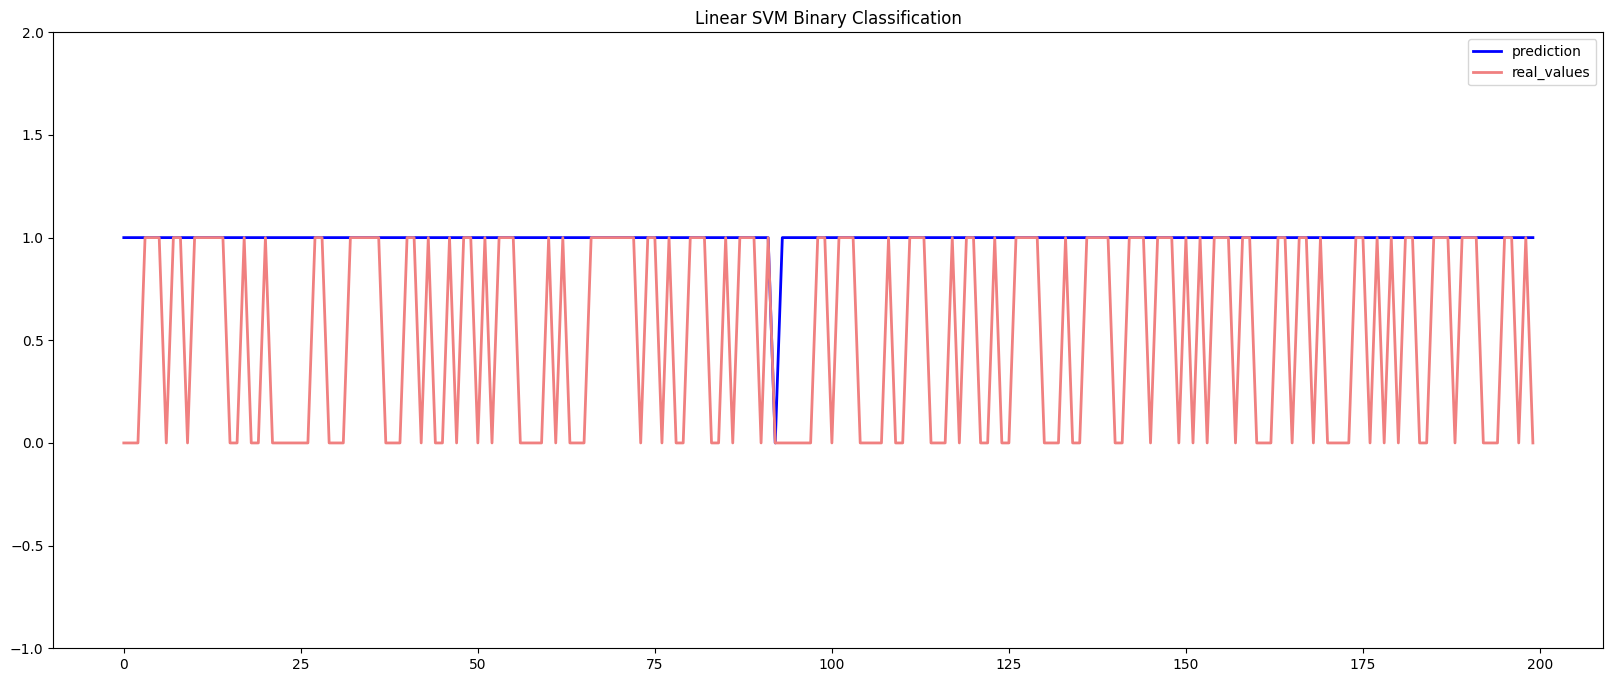

In [ ]:
if svm_enable:
  plt.figure(figsize=(20,8))
  plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
  plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
  plt.legend(loc="best")
  plt.ylim((-1,2))
  plt.title("Linear SVM Binary Classification")
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lsvm_real_pred_bin.png')
  plt.show()

In [ ]:
if svm_enable:
  target_names = ['class 0', 'class 1']
  print(classification_report(y_test, y_pred, target_names=target_names))
  fpr, fnr, thresholds = det_curve(y_test, y_pred)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

              precision    recall  f1-score   support

     class 0       1.00      0.01      0.02      3379
     class 1       0.46      1.00      0.63      2882

    accuracy                           0.46      6261
   macro avg       0.73      0.50      0.32      6261
weighted avg       0.75      0.46      0.30      6261

False Positive Rate -  [0.99200947]
False Negative Rate -  [0.]
Thresholds -  [1.]


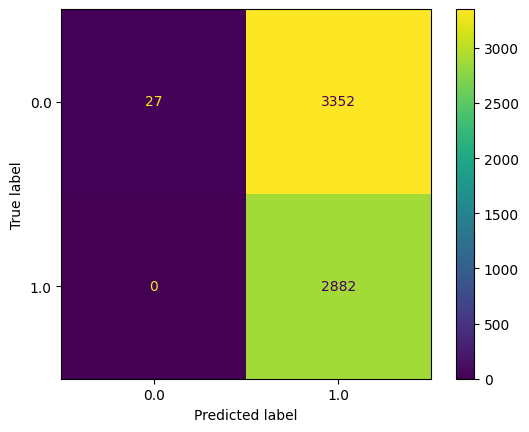

In [ ]:
if svm_enable:
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

  clf = lsvm
  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=clf.classes_)
  disp.plot()

  plt.show()

## **Multi Layer Perceptron Classifier (Binary Classification)**

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  mlp = Sequential() # creating model

  # adding input layer and first layer with 50 neurons
  mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
  # output layer with sigmoid activation
  mlp.add(Dense(units=1,activation='sigmoid'))

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # summary of model layers
  mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                5900      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,951
Trainable params: 5,951
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # training the model on training dataset
  history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 1s 88ms/step - loss: 0.9389 - accuracy: 0.4546 - val_loss: 0.7297 - val_accuracy: 0.4714
Epoch 2/100
4/4 [==============================] - 0s 26ms/step - loss: 0.7129 - accuracy: 0.4680 - val_loss: 0.6804 - val_accuracy: 0.5377
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 0.6729 - accuracy: 0.5455 - val_loss: 0.6683 - val_accuracy: 0.5369
Epoch 4/100
4/4 [==============================] - 0s 26ms/step - loss: 0.6555 - accuracy: 0.5479 - val_loss: 0.6292 - val_accuracy: 0.5499
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 0.6183 - accuracy: 0.7613 - val_loss: 0.6079 - val_accuracy: 0.7421
Epoch 6/100
4/4 [==============================] - 0s 30ms/step - loss: 0.6081 - accuracy: 0.6972 - val_loss: 0.5933 - val_accuracy: 0.7812
Epoch 7/100
4/4 [==============================] - 0s 23ms/step - loss: 0.5879 - accuracy: 0.8908 - val_loss: 0.5754 - val_accuracy: 0.9579
Epoch 8/100
4/4 [===

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/mlp_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/mlp_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    mlp_json = mlp.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(mlp_json)

    # serialize weights to HDF5
    mlp.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    mlp = model_from_json(loaded_model_json)

    # load weights into new model
    mlp.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # predicting target attribute on testing dataset
  test_results = mlp.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

196/196 [==============================] - 1s 2ms/step - loss: 3218428.5000 - accuracy: 0.4621
Test results - Loss: 3218428.5 - Accuracy: 46.206676959991455


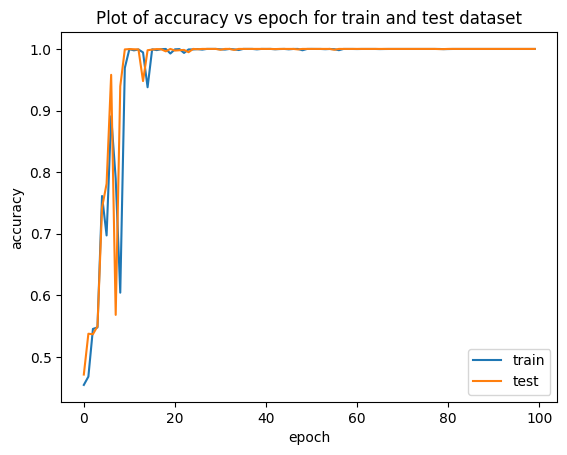

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":  
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_accuracy.png')
  plt.show()

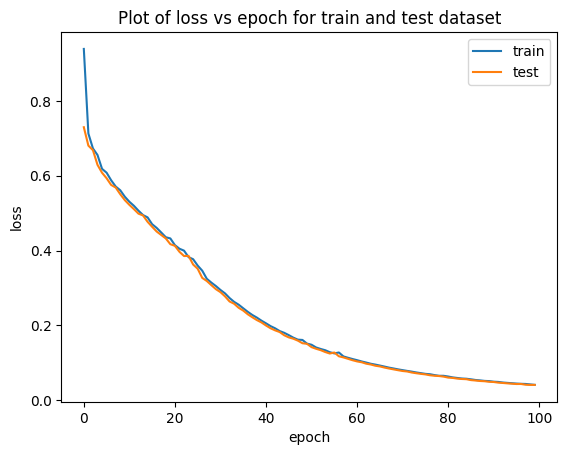

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Plot of loss vs epoch for train and test dataset')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_loss.png')
  plt.show()

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # representation of model layers
  from keras.utils.vis_utils import plot_model
  plot_model(mlp, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary.png', show_shapes=True,)

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_pred = mlp.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  auc = auc(fpr, tpr)

196/196 [==============================] - 0s 2ms/step


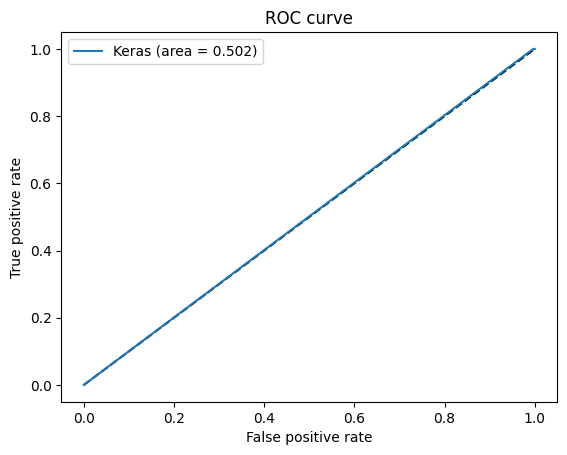

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_roc.png')
  plt.show()

In [ ]:
# real_data_kdd = bin_data.copy()

# # Names of the columns that are discrete
# cat_cols = real_data_kdd.select_dtypes(['object']).columns
# # cat_cols
# test_data = real_data_kdd.iloc[:999]

# corr= test_data.corr()
# corr_y = abs(corr['label'])
# highest_corr = corr_y
# highest_corr.sort_values(ascending=True)

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_classes = (mlp.predict(X_test)>0.5).astype('int32')

196/196 [==============================] - 0s 1ms/step


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  1.0
F1 Score -  0.6311870346035917
Precision Score -  0.46112
False Positive Rate -  [0.9967446]
False Negative Rate -  [0.]
Thresholds -  [1]


              precision    recall  f1-score   support

           0       1.00      0.00      0.01      3379
           1       0.46      1.00      0.63      2882

    accuracy                           0.46      6261
   macro avg       0.73      0.50      0.32      6261
weighted avg       0.75      0.46      0.29      6261



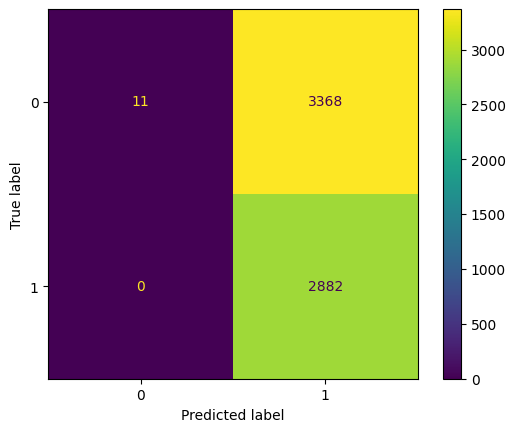

In [ ]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

# **Correlation** Matrix of Features

In [ ]:
corr= bin_data.corr()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.3]
highest_corr.sort_values(ascending=True)

X65           0.347362
X57           0.379976
X109          0.444706
X64           0.539653
Unnamed: 0    0.828391
label         1.000000
Name: label, dtype: float64

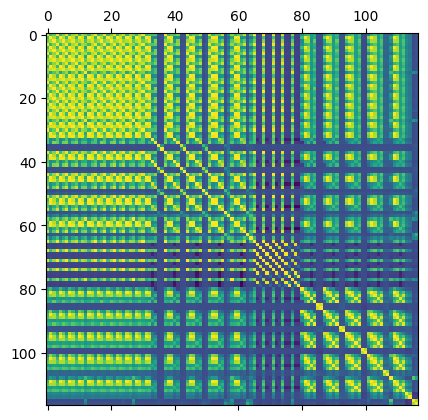

In [ ]:
plt.matshow(corr)
plt.show()

## **LSTM Classifier**

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
# y_train.shape   #(18896,)
X_train.shape

(18782, 117)

In [ ]:
y_train = np.array(y_train)
type(y_train)

numpy.ndarray

In [ ]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
x_train.shape

(18782, 1, 117)

In [ ]:
x_train.shape[2]

117

In [ ]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
x_test.shape

(6261, 1, 117)

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  lst = Sequential()
  # input layer and LSTM layer with 50 neurons
  input_features = x_train.shape[2]
  lst.add(LSTM(50,input_dim=input_features))

  # outpute layer with sigmoid activation
  lst.add(Dense(1,activation='sigmoid'))

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # summary of model layers
  lst.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                33600     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 33,651
Trainable params: 33,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # training the model on training dataset
  history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 3s 156ms/step - loss: 0.6845 - accuracy: 0.5450 - val_loss: 0.6713 - val_accuracy: 0.5379
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6661 - accuracy: 0.5459 - val_loss: 0.6556 - val_accuracy: 0.5369
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6490 - accuracy: 0.5491 - val_loss: 0.6385 - val_accuracy: 0.8752
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6353 - accuracy: 0.9143 - val_loss: 0.6220 - val_accuracy: 0.8635
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6173 - accuracy: 0.8429 - val_loss: 0.6064 - val_accuracy: 0.8203
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6010 - accuracy: 0.8366 - val_loss: 0.5899 - val_accuracy: 0.9313
Epoch 7/100
4/4 [==============================] - 0s 23ms/step - loss: 0.5869 - accuracy: 0.9330 - val_loss: 0.5735 - val_accuracy: 0.9449
Epoch 8/100
4/4 [==

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/lst_binary_kitsune'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/lst_binary_kitsune'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    lst_json = lst.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(lst_json)

    # serialize weights to HDF5
    lst.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    lst = model_from_json(loaded_model_json)

    # load weights into new model
    lst.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Loaded model from disk


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # predicting target attribute on testing dataset
  test_results = lst.evaluate(x_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

196/196 [==============================] - 1s 3ms/step - loss: 0.9819 - accuracy: 0.4613
Test results - Loss: 0.981939435005188 - Accuracy: 46.12681567668915%


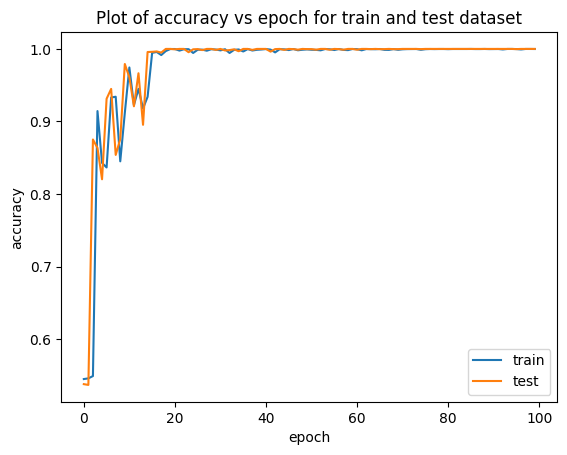

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_accuracy.png')
  plt.show()

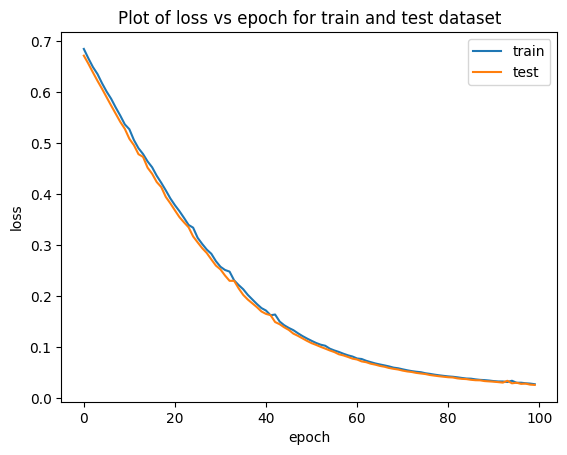

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_loss.png')
  plt.show()

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # representation of model layers
  plot_model(lst, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary.png', show_shapes=True,)

In [ ]:
y_test = np.array(y_test)
y_test.shape

(6261,)

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  y_classes = (lst.predict(x_test)>0.5).astype('int32')

196/196 [==============================] - 1s 2ms/step


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  1.0
F1 Score -  0.6308416329210901
Precision Score -  0.4607513988808953
False Positive Rate -  [0.99822433]
False Negative Rate -  [0.]
Thresholds -  [1]


              precision    recall  f1-score   support

           0       1.00      0.00      0.00      3379
           1       0.46      1.00      0.63      2882

    accuracy                           0.46      6261
   macro avg       0.73      0.50      0.32      6261
weighted avg       0.75      0.46      0.29      6261



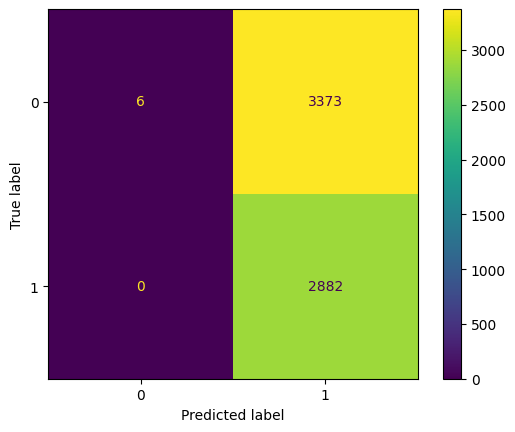

In [ ]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

## **Auto Encoder**

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # splitting the dataset 75% for training and 25% testing
  X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_train = X_train.drop(['label'],axis=1) 

  y_test = X_test['label'] # target attribute

  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_test = X_test.drop(['label'],axis=1)
  # calling the normalization() function
  X_train = normalization_train(X_train,numeric_cols)
  X_test = normalization_test(X_test,numeric_cols)
  X_train = X_train.values
  X_test = X_test.values
  y_test = y_test.values

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  input_dim = X_train.shape[1]
  encoding_dim = 50

  #input layer
  input_layer = Input(shape=(input_dim, ))
  #encoding layer with 50 neurons
  encoder = Dense(encoding_dim, activation="relu")(input_layer)           
  #decoding and output layer
  output_layer = Dense(input_dim, activation='softmax')(encoder)

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  autoencoder = Model(inputs=input_layer, outputs=output_layer)

  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_6 (Dense)             (None, 50)                5850      
                                                                 
 dense_7 (Dense)             (None, 116)               5916      
                                                                 
Total params: 11,766
Trainable params: 11,766
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
38/38 [==============================] - 1s 8ms/step - loss: 0.5085 - accuracy: 0.0019 - val_loss: 18404860428812288.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 0.5070 - accuracy: 0.0052 - val_loss: 18404860428812288.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 0.5066 - accuracy: 0.0210 - val_loss: 18404860428812288.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.5065 - accuracy: 0.0289 - val_loss: 18404860428812288.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 0.5064 - accuracy: 0.0672 - val_loss: 18404860428812288.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 0.5063 - accuracy: 0.0709 - val_loss: 18404860428812288.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
38/38 [===============

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    autoencoder_json = autoencoder.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(autoencoder_json)

    # serialize weights to HDF5
    autoencoder.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    autoencoder = model_from_json(loaded_model_json)

    # load weights into new model
    autoencoder.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

196/196 [==============================] - 1s 2ms/step - loss: 18404856133844992.0000 - accuracy: 0.0000e+00
Test results - Loss: 1.840485613384499e+16 - Accuracy: 0.0%


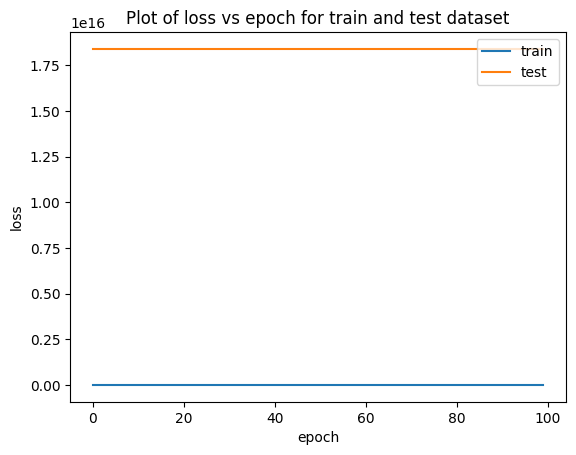

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_loss.png')
  plt.show()

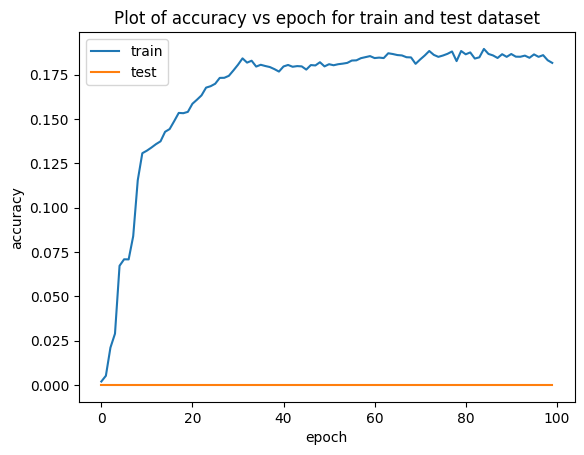

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_accuracy.png')
  plt.show()

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(autoencoder, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary.png', show_shapes=True,)

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # calculating reconstruction error 
  predictions = autoencoder.predict(X_test)

196/196 [==============================] - 0s 2ms/step


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  mse = np.mean(np.power(X_test - predictions, 2), axis=1)
  error_df = pd.DataFrame({'reconstruction_error': mse,
                           'true_class': y_test})

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  error_df.describe()
  print(predictions.shape)

(6261, 116)


## **AE Classifier**

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  i_dim = predictions.shape[1]

  #input layer
  i_layer = Input(shape=(i_dim, ))
  #hidden layer with 50 neurons
  fvector = Dense(50, activation="sigmoid")(i_layer)                    
  #doutput layer
  o_layer = Dense(1, activation='sigmoid')(fvector)

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  ae_classifier = Model(inputs=i_layer, outputs=o_layer)

  # defining loss function, optimizer, metrics and then compiling model
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  ae_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_8 (Dense)             (None, 50)                5850      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  his = ae_classifier.fit(predictions, y_test, epochs=300,batch_size=500, validation_split=0.2).history

Epoch 1/300
11/11 [==============================] - 1s 19ms/step - loss: 0.7177 - accuracy: 0.5419 - val_loss: 0.7052 - val_accuracy: 0.5307
Epoch 2/300
11/11 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.5419 - val_loss: 0.6932 - val_accuracy: 0.5307
Epoch 3/300
11/11 [==============================] - 0s 7ms/step - loss: 0.6895 - accuracy: 0.5419 - val_loss: 0.6910 - val_accuracy: 0.5307
Epoch 4/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6890 - accuracy: 0.5419 - val_loss: 0.6906 - val_accuracy: 0.5307
Epoch 5/300
11/11 [==============================] - 0s 7ms/step - loss: 0.6889 - accuracy: 0.5419 - val_loss: 0.6906 - val_accuracy: 0.5307
Epoch 6/300
11/11 [==============================] - 0s 7ms/step - loss: 0.6889 - accuracy: 0.5419 - val_loss: 0.6909 - val_accuracy: 0.5307
Epoch 7/300
11/11 [==============================] - 0s 6ms/step - loss: 0.6887 - accuracy: 0.5419 - val_loss: 0.6903 - val_accuracy: 0.5307
Epoch 8/300


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_classifier_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_classifier_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    ae_classifier_json = ae_classifier.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(ae_classifier_json)

    # serialize weights to HDF5
    ae_classifier.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    ae_classifier = model_from_json(loaded_model_json)

    # load weights into new model
    ae_classifier.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

196/196 [==============================] - 1s 3ms/step - loss: 0.6817 - accuracy: 0.5397
Test results - Loss: 0.6816662549972534 - Accuracy: 53.969013690948486%


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(ae_classifier, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary.png', show_shapes=True)

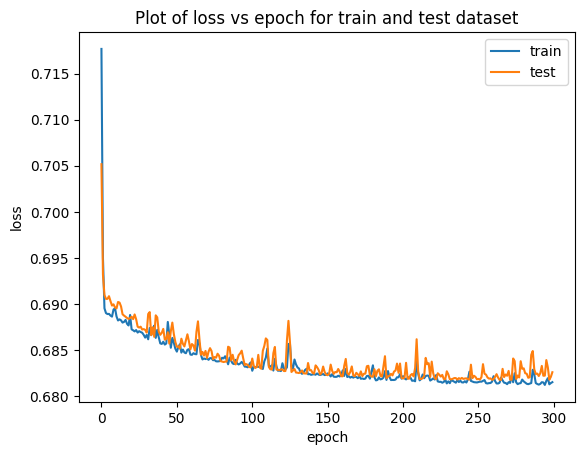

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(his['loss'])
  plt.plot(his['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_loss.png')
  plt.show()

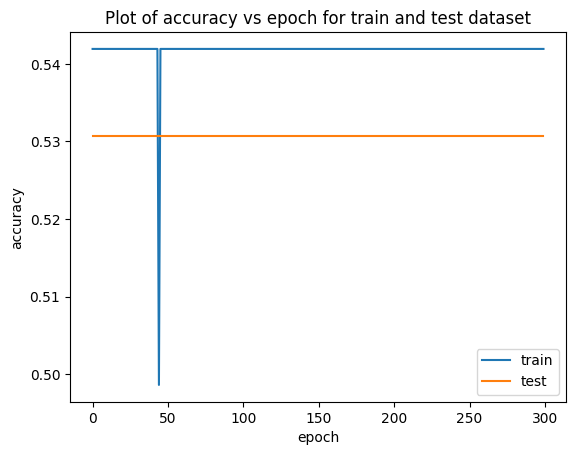

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(his['accuracy'])
  plt.plot(his['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_accuracy.png')
  plt.show()

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  y_pred = ae_classifier.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  #auc = auc(fpr, tpr)

196/196 [==============================] - 0s 1ms/step


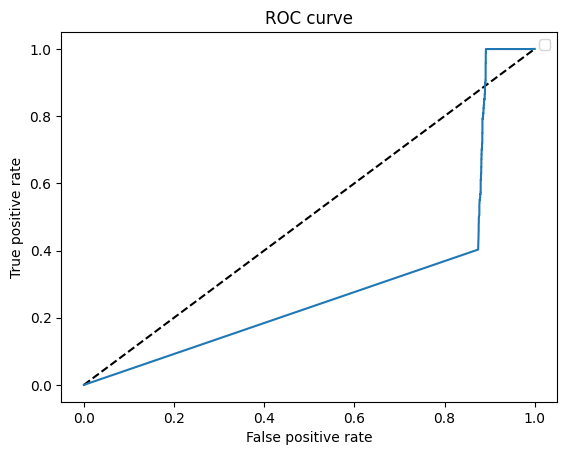

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  plt.plot([0, 1], [0, 1], 'k--')
  #plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.plot(fpr, tpr)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_roc.png')
  plt.show()

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  pred = ae_classifier.predict(X_test)
  y_classes = (ae_classifier.predict(X_test)>0.5).astype('int32')

196/196 [==============================] - 0s 1ms/step


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.0
F1 Score -  0.0
Precision Score -  0.0
False Positive Rate -  [1.]
False Negative Rate -  [0.]
Thresholds -  [0]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.54      1.00      0.70      3379
           1       0.00      0.00      0.00      2882

    accuracy                           0.54      6261
   macro avg       0.27      0.50      0.35      6261
weighted avg       0.29      0.54      0.38      6261



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


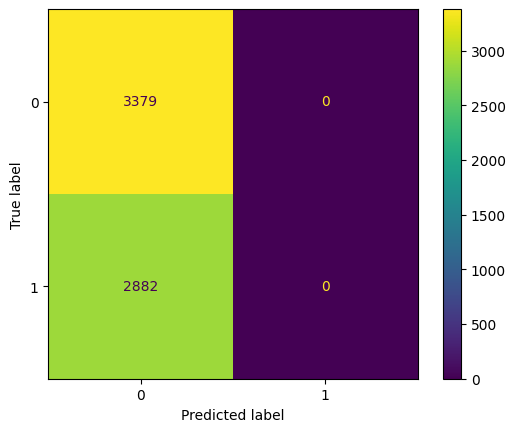

In [ ]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()